In [ ]:
!unzip /archive.zip

Archive:  /archive.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Assuming each line in the TXT file contains tab-separated values
# Adjust the delimiter based on the actual format of your data
with open('/content/Genre Classification Dataset/train_data.txt', 'r') as file:
    movie_data = file.readlines()

# Split each line into columns
data = [line.strip().split(' ::: ') for line in movie_data]

# Create a DataFrame
columns = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
df = pd.DataFrame(data, columns=columns)
print(df)


          ID                                       TITLE        GENRE  \
0          1                Oscar et la dame rose (2009)        drama   
1          2                                Cupid (1997)     thriller   
2          3            Young, Wild and Wonderful (1980)        adult   
3          4                       The Secret Sin (1915)        drama   
4          5                      The Unrecovered (2007)        drama   
...      ...                                         ...          ...   
54209  54210                             "Bonino" (1953)       comedy   
54210  54211                 Dead Girls Don't Cry (????)       horror   
54211  54212   Ronald Goedemondt: Ze bestaan echt (2008)  documentary   
54212  54213                    Make Your Own Bed (1944)       comedy   
54213  54214  Nature's Fury: Storm of the Century (2006)      history   

                                             DESCRIPTION  
0      Listening in to a conversation between his doc...  
1    

In [ ]:
# Drop missing values
df = df.dropna()

# Optionally, you might want to convert genre labels to lowercase for consistency
df['GENRE'] = df['GENRE'].str.lower()
print(df)


          ID                                       TITLE        GENRE  \
0          1                Oscar et la dame rose (2009)        drama   
1          2                                Cupid (1997)     thriller   
2          3            Young, Wild and Wonderful (1980)        adult   
3          4                       The Secret Sin (1915)        drama   
4          5                      The Unrecovered (2007)        drama   
...      ...                                         ...          ...   
54209  54210                             "Bonino" (1953)       comedy   
54210  54211                 Dead Girls Don't Cry (????)       horror   
54211  54212   Ronald Goedemondt: Ze bestaan echt (2008)  documentary   
54212  54213                    Make Your Own Bed (1944)       comedy   
54213  54214  Nature's Fury: Storm of the Century (2006)      history   

                                             DESCRIPTION  
0      Listening in to a conversation between his doc...  
1    

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    df['DESCRIPTION'], df['GENRE'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(train_data)
tfidf_test = tfidf_vectorizer.transform(test_data)


In [ ]:
print("TF-IDF Representation for Training Data:")
print(tfidf_train[:5])  # Print the first 5 rows for illustration purposes

print("\nTF-IDF Representation for Testing Data:")
print(tfidf_test[:5])  # Print the first 5 rows for illustration purposes


TF-IDF Representation for Training Data:
  (0, 2722)	0.11286921853273077
  (0, 1651)	0.22770557069530334
  (0, 2696)	0.17159557829516064
  (0, 1180)	0.2108186393535766
  (0, 1519)	0.23247572402247513
  (0, 4794)	0.1987793489229311
  (0, 4545)	0.1019971593657092
  (0, 1036)	0.25474163376277464
  (0, 4174)	0.24890052137913724
  (0, 4970)	0.2519217039577482
  (0, 2858)	0.19101305037003716
  (0, 2500)	0.16181782077028492
  (0, 2771)	0.2003471567446759
  (0, 2707)	0.24612410658333533
  (0, 777)	0.31034350294769564
  (0, 584)	0.21891529845194335
  (0, 4951)	0.18973874638672772
  (0, 3129)	0.21292296964208723
  (0, 2106)	0.21943616653301587
  (0, 2764)	0.10580604200447527
  (0, 150)	0.20974699517892456
  (0, 509)	0.22014319823471998
  (0, 4046)	0.1627428431786201
  (1, 4096)	0.16321073578992715
  (1, 3720)	0.1556844421491771
  :	:
  (4, 2308)	0.12103182987891509
  (4, 1050)	0.1855410868943902
  (4, 1738)	0.15969463489468436
  (4, 2203)	0.168880804166859
  (4, 2606)	0.1855410868943902
  (4, 47

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF Feature Names:")
print(feature_names)


TF-IDF Feature Names:
['000' '10' '100' ... 'zombie' 'zombies' 'zone']


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(tfidf_train, train_labels)


MultinomialNB()

In [ ]:
predictions = nb_model.predict(tfidf_test)

from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model with the zero_division parameter
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions, zero_division=1)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.5231946878170248
Classification Report:
               precision    recall  f1-score   support

      action       0.58      0.08      0.14       263
       adult       0.88      0.06      0.12       112
   adventure       0.29      0.03      0.05       139
   animation       1.00      0.00      0.00       104
   biography       1.00      0.00      0.00        61
      comedy       0.51      0.44      0.47      1443
       crime       1.00      0.00      0.00       107
 documentary       0.58      0.88      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       1.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       1.00      0.00      0.00        45
      horror       0.73      0.36      0.48       431
       music       0.77      0.12      0.20       144
     musical       1.00      0.00      0.00        50
     mystery       1.00     

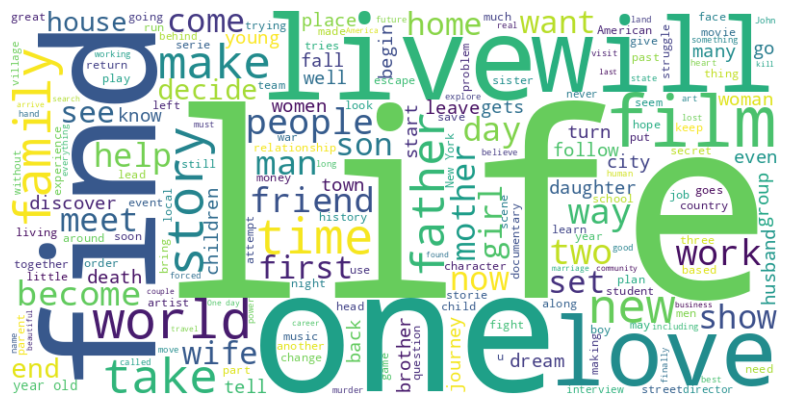

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string for word cloud
all_descriptions = ' '.join(train_data)

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


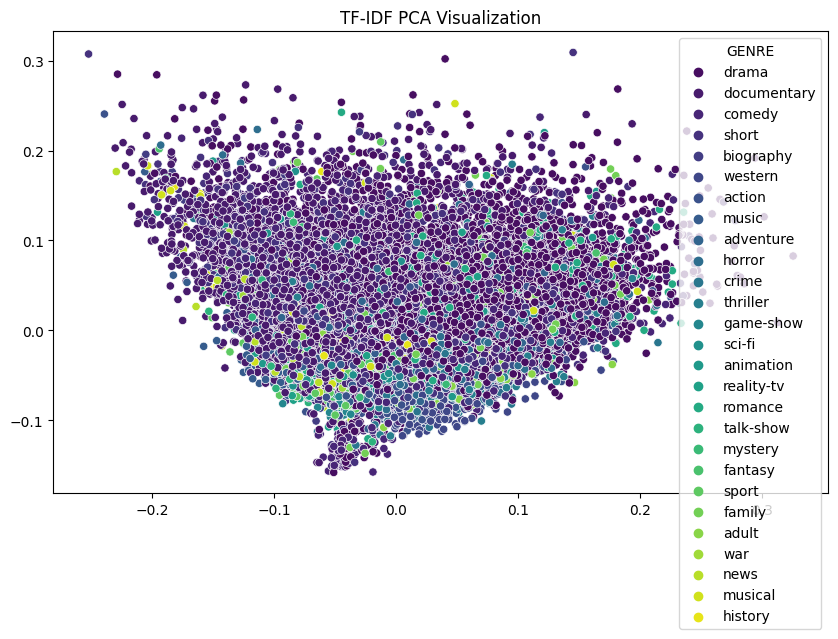

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Fit PCA to the TF-IDF representations
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_train.toarray())

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=train_labels, palette='viridis')
plt.title('TF-IDF PCA Visualization')
plt.show()


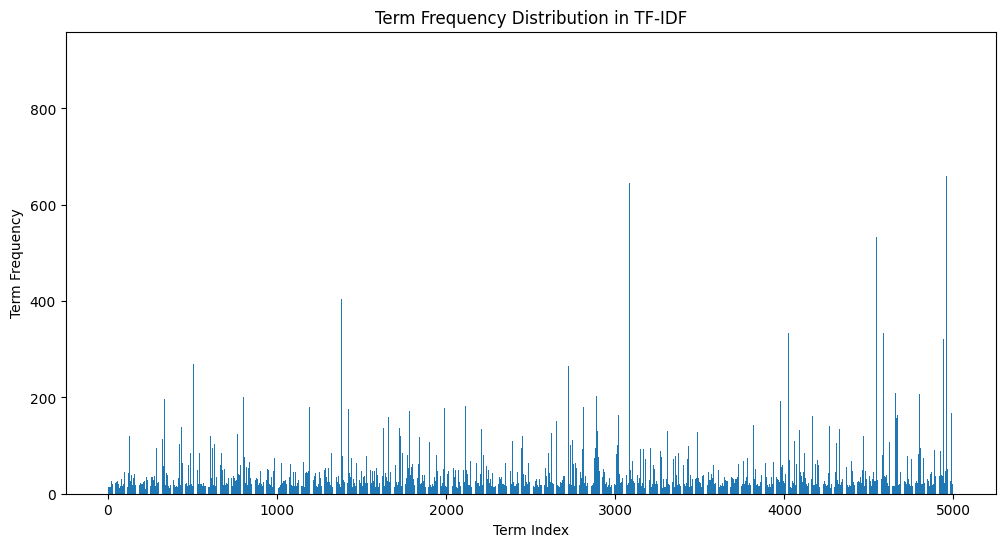

In [ ]:
import numpy as np

# Compute term frequencies
term_frequencies = np.sum(tfidf_train.toarray(), axis=0)

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(term_frequencies)), term_frequencies)
plt.xlabel('Term Index')
plt.ylabel('Term Frequency')
plt.title('Term Frequency Distribution in TF-IDF')
plt.show()


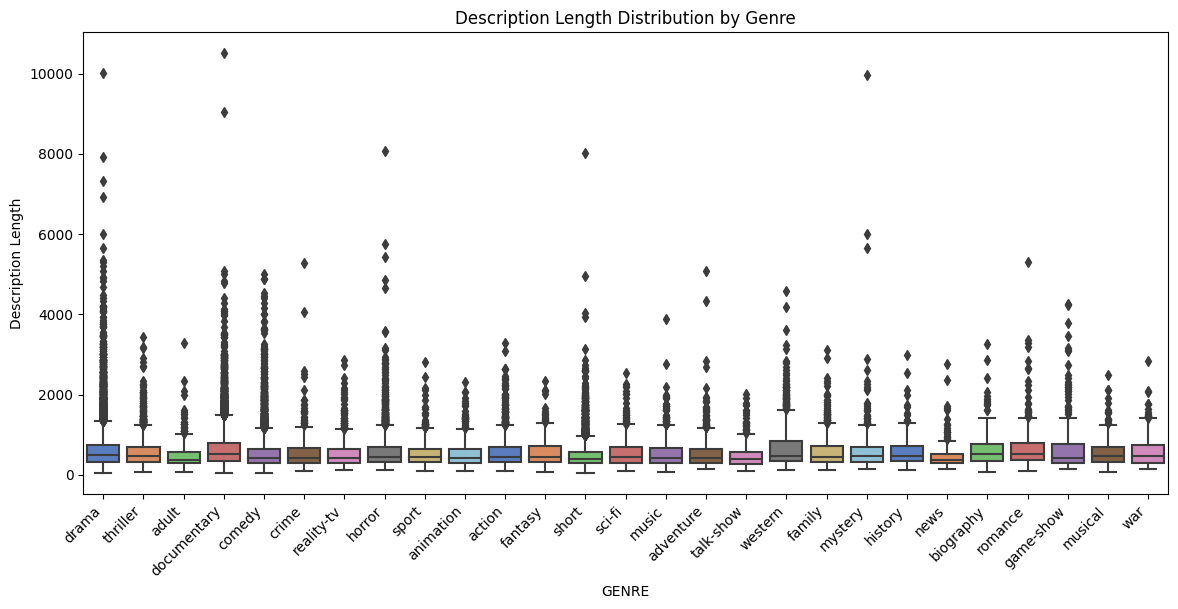

In [ ]:
# Add a new column for description lengths
df['Description Length'] = df['DESCRIPTION'].apply(len)

# Create a box plot of description lengths by genre
plt.figure(figsize=(14, 6))
sns.boxplot(x='GENRE', y='Description Length', data=df, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Description Length Distribution by Genre')
plt.show()
